In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Dataset .csv')

In [3]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


Here the goal is to classify the restaurants based on the cusines that they serve.

Steps:
- First we need to preprocess the data
- Drop unnessary columns
- Then categorical to int conversion
- Train test split
- model building
- data visualization

In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df = data.drop(['Restaurant ID','City','Address','Locality','Locality Verbose','Longitude',
               'Latitude','Switch to order menu','Rating text'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   Cuisines              9542 non-null   object 
 3   Average Cost for two  9551 non-null   int64  
 4   Currency              9551 non-null   object 
 5   Has Table booking     9551 non-null   object 
 6   Has Online delivery   9551 non-null   object 
 7   Is delivering now     9551 non-null   object 
 8   Price range           9551 non-null   int64  
 9   Aggregate rating      9551 non-null   float64
 10  Rating color          9551 non-null   object 
 11  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 895.5+ KB


In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9542 non-null   object 
 1   Country Code          9542 non-null   int64  
 2   Cuisines              9542 non-null   object 
 3   Average Cost for two  9542 non-null   int64  
 4   Currency              9542 non-null   object 
 5   Has Table booking     9542 non-null   object 
 6   Has Online delivery   9542 non-null   object 
 7   Is delivering now     9542 non-null   object 
 8   Price range           9542 non-null   int64  
 9   Aggregate rating      9542 non-null   float64
 10  Rating color          9542 non-null   object 
 11  Votes                 9542 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 969.1+ KB


Now we need to generate or define the target variable.
Since no target variable is given and out motto is to classify the restaurats based on cuisines, 
we will take the target variable as the main theme of food of the restaurant like  italian or chinese or indian like that.

For this we need to consider the first cuisine in thier cuisine column as the main cuisine or target variable.

In [8]:
from sklearn.preprocessing import LabelEncoder

cols = df.select_dtypes(include='object').columns.tolist()
cols.remove('Restaurant Name')
cols.remove('Cuisines')
for i in cols:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
print(df.head())

          Restaurant Name  Country Code                          Cuisines  \
0        Le Petit Souffle           162        French, Japanese, Desserts   
1        Izakaya Kikufuji           162                          Japanese   
2  Heat - Edsa Shangri-La           162  Seafood, Asian, Filipino, Indian   
3                    Ooma           162                   Japanese, Sushi   
4             Sambo Kojin           162                  Japanese, Korean   

   Average Cost for two  Currency  Has Table booking  Has Online delivery  \
0                  1100         0                  1                    0   
1                  1200         0                  1                    0   
2                  4000         0                  1                    0   
3                  1500         0                  0                    0   
4                  1500         0                  1                    0   

   Is delivering now  Price range  Aggregate rating  Rating color  Votes  

In [9]:
df['Cuisine_list'] = df['Cuisines'].str.split(', ')
print(df.head(2))

    Restaurant Name  Country Code                    Cuisines  \
0  Le Petit Souffle           162  French, Japanese, Desserts   
1  Izakaya Kikufuji           162                    Japanese   

   Average Cost for two  Currency  Has Table booking  Has Online delivery  \
0                  1100         0                  1                    0   
1                  1200         0                  1                    0   

   Is delivering now  Price range  Aggregate rating  Rating color  Votes  \
0                  0            3               4.8             0    314   
1                  0            3               4.5             0    591   

                   Cuisine_list  
0  [French, Japanese, Desserts]  
1                    [Japanese]  


In [12]:
df['Target'] = df['Cuisine_list'].apply(lambda x:x[0] if len(x)>0 else None)

0                French
1              Japanese
2               Seafood
3              Japanese
4              Japanese
             ...       
9546            Turkish
9547      World Cuisine
9548            Italian
9549    Restaurant Cafe
9550               Cafe
Name: Target, Length: 9542, dtype: object


In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

In [14]:
df['Cuisine_list'] = df['Cuisines'].str.split(', ')
mlb = MultiLabelBinarizer()
df_encoded = df.join(pd.DataFrame(mlb.fit_transform(df.pop('Cuisine_list')),
                                 columns = mlb.classes_,
                                 index = df.index))
print(df_encoded.head(2))

               Restaurant Name  Country Code  \
0             Le Petit Souffle           162   
1             Izakaya Kikufuji           162   
2       Heat - Edsa Shangri-La           162   
3                         Ooma           162   
4                  Sambo Kojin           162   
...                        ...           ...   
9546               Naml۱ Gurme           208   
9547              Ceviz A��ac۱           208   
9548                     Huqqa           208   
9549               A���k Kahve           208   
9550  Walter's Coffee Roastery           208   

                              Cuisines  Average Cost for two  Currency  \
0           French, Japanese, Desserts                  1100         0   
1                             Japanese                  1200         0   
2     Seafood, Asian, Filipino, Indian                  4000         0   
3                      Japanese, Sushi                  1500         0   
4                     Japanese, Korean               

In [30]:
df_encoded['Target'] = le.fit_transform(df_encoded['Target'])

In [31]:
df_encoded['Target']

0        39
1        55
2        97
3        55
4        55
       ... 
9546    114
9547    118
9548     54
9549     93
9550     23
Name: Target, Length: 9542, dtype: int32

In [32]:
df_encoded.columns.tolist()

['Restaurant Name',
 'Country Code',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Votes',
 'Target',
 'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Argentine',
 'Armenian',
 'Asian',
 'Asian Fusion',
 'Assamese',
 'Australian',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Brazilian',
 'Breakfast',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'B�_rek',
 'Cafe',
 'Cajun',
 'Canadian',
 'Cantonese',
 'Caribbean',
 'Charcoal Grill',
 'Chettinad',
 'Chinese',
 'Coffee and Tea',
 'Contemporary',
 'Continental',
 'Cuban',
 'Cuisine Varies',
 'Curry',
 'Deli',
 'Desserts',
 'Dim Sum',
 'Diner',
 'Drinks Only',
 'Durban',
 'D�_ner',
 'European',
 'Fast Food',
 'Filipino',
 'Finger Food',
 'Fish and Chips',
 'French',
 'Fusion',
 'German',
 'Goan',
 'Gourmet Fast Food',
 'Greek',
 'Grill

In [41]:
y = df_encoded['Target']
X = df_encoded.drop(['Restaurant Name','Target','Cuisines'],axis=1)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [46]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
model1.score(X_test,y_test)

0.2891566265060241

In [50]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.788370874803562

In [51]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.8234677841801991

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
y_pred = model3.predict(X_test)

In [57]:
cr = classification_report(y_test,y_pred)
cr

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall 

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         0\n           1       0.00      0.00      0.00         0\n           2       0.90      0.90      0.90        51\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00         2\n           6       0.56      0.42      0.48        12\n           8       0.00      0.00      0.00         0\n           9       0.00      0.00      0.00         0\n          10       0.00      0.00      0.00         3\n          11       0.80      0.67      0.73         6\n          12       0.92      0.98      0.95       125\n          13       1.00      0.50      0.67         2\n          14       0.33      0.25      0.29         4\n          15       0.92      0.80      0.86        15\n          17       1.00      0.83      0.91        18\n          18       0.86      0.86      0.86         7\n          19       0.67      1.00      0.80         2\n       

In [58]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 46, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [59]:
import seaborn as sns

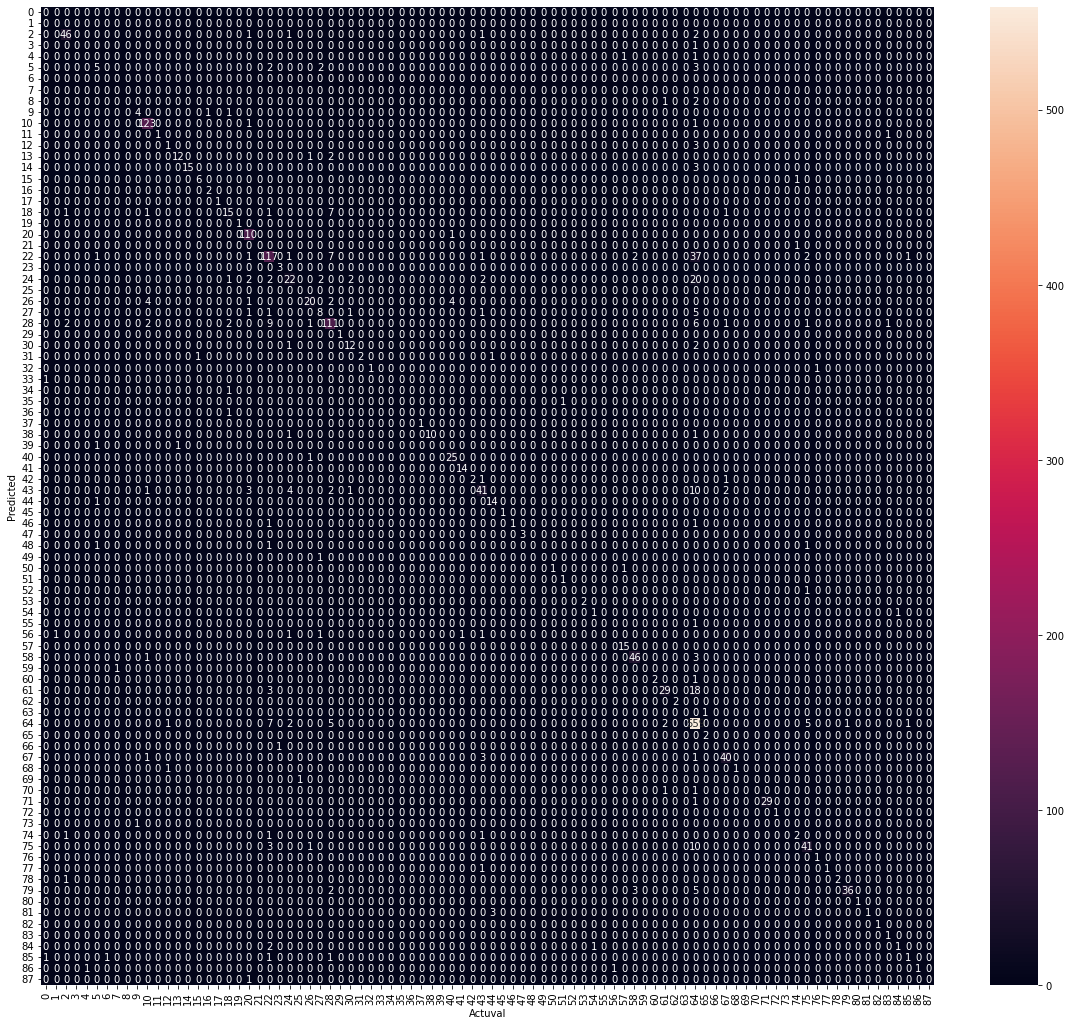

In [61]:
plt.figure(figsize=(20,18))
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Actuval')
plt.ylabel('Predicted')
plt.show()